# RA Single cell Project Figure 1

<br>

**Description**:This Jupyternotebook summarise all the figures involved in figure 1 and supplemetal describing the subsets\
**Author**: Brenda Miao - Marie Binvignat\
**Version**: 1.0  
**Last updated**: 02/01/23

<br>

**<font size="2">Single Cell Transcriptomics Analysis of Blood Immune Cells Identifies Gene Signatures and Cell Subsets Associated with Disease Activity in a Diverse Population of Rheumatoid Arthritis Patients<font>**
<br>  
<font size="2"> Binvignat M*, Miao B*, Wibrand C, Yang M, Rychkov D, Flynn E, Nititham J, Carvidi A, Krueger M, Niemi E, Sun Y, Klatzmann D, Mariotti-Ferrandiz E, Sellam J,Gross A, Ye J, Butte AJ, Criswell LA, Nakamura M, Sirota <font><br>
<font size="1"> **equal contribution* <font> 

## Load functions

Loading python pacakges, preprocessing, helping and DEG functions used for the analysis

In [1]:
## start here
# get functions
from functions.preprocessing import *
from functions.DEGAnalysis import *

#sns.set_style("ticks")
#sns.set_context("talk")

sns.set(style="ticks")
sns.set_context("notebook")

## Figure 1B


UMAP embeddings and subset annotations of single cell RNAseq dataset from patients with rheumatoid arthritis (n=18) and healthy controls (n=18) matched on age, sex, and ethnicity.

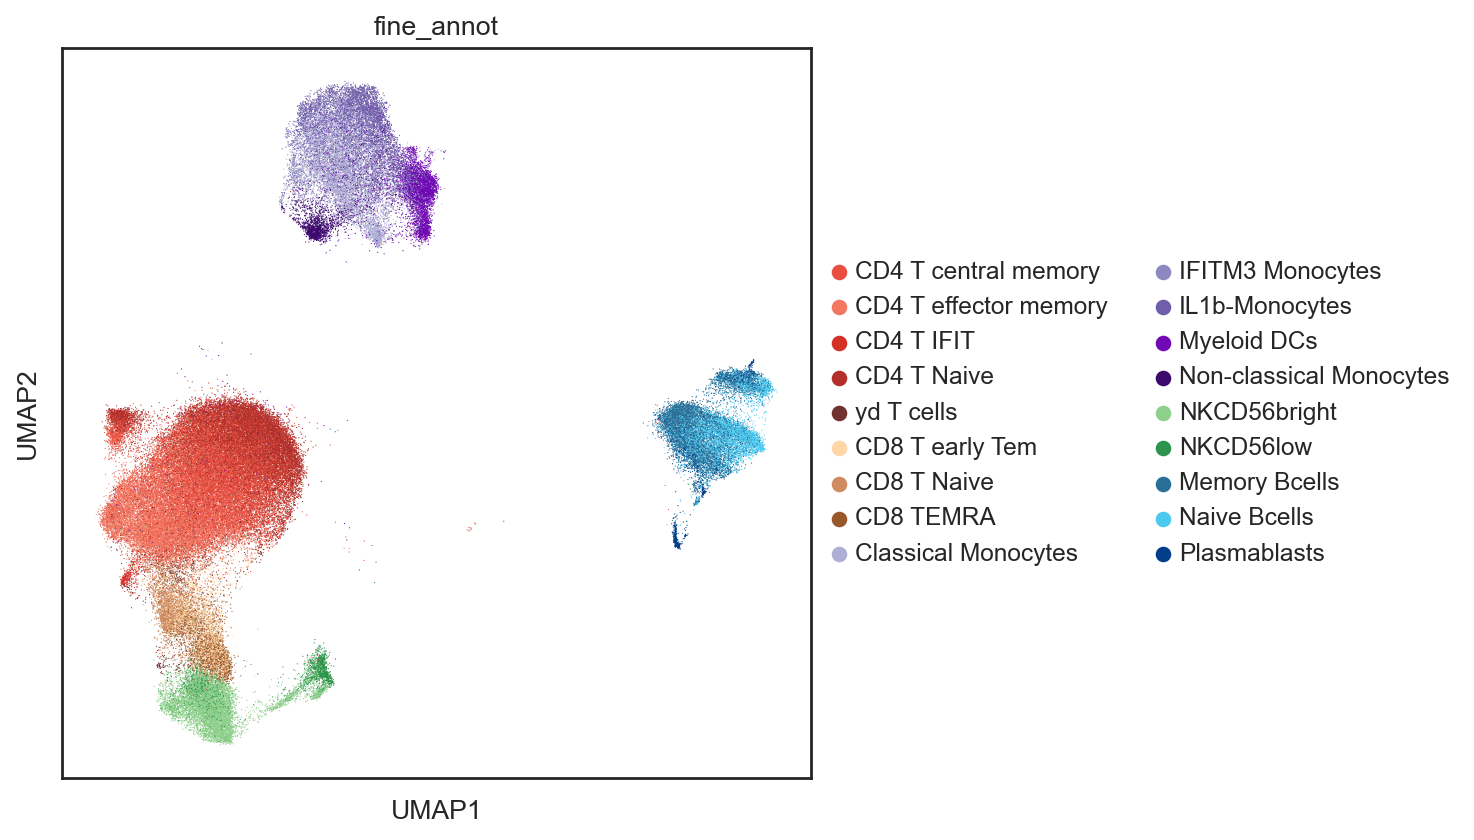

In [3]:
plt.rcParams["figure.figsize"] = (6,6)
inputPath = './dataOutput/adata/final.h5ad'
figurePath = './figures/figure1B.pdf'
adata = sc.read(inputPath)

color_subset = ['#ea4e40','#f37761', '#d33028', '#b3302a', '#72322f',
                '#FFD6A5','#d08c60','#99582a',
                '#afaed4','#8d89c0','#705eaa', '#7209b7','#3c096c',
                '#8ed08b', '#2c944c',
                '#2a6f97','#4cc9f0','#023e8a','#0267c1',  '#A0C4FF']

sc.pl.umap(adata, color = "fine_annot", palette = color_subset, save ="Figure1B.pdf")


## Figure 1C & 2B


Characterization of cell types and subsets. Normalized expression of cell type specific gene markers are plotted in the heatmap (A), and top genes differentially expressed between cell subsets (Wilcoxon rank test, FDR≤0.05) are shown in the dotplots (B). 

In [2]:
### Figure 1C
inputPath = './dataOutput/adata/final.h5ad'

#sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, key="rough_annot", use_raw = False, ncols=6)

adata = sc.read(inputPath)
adata.uns['log1p']['base'] = None 

sc.tl.rank_genes_groups(adata, groupby="rough_annot", use_raw=False, pts=True, method='wilcoxon')
sc.pp.scale(adata, zero_center = True)

matrix_df = sc.pl.rank_genes_groups_heatmap(adata,groupby = "rough_annot",
                                n_genes =8, 
                                use_raw =False, 
                                cmap = "viridis",
                                vmax  = 2.5, vmin = -0.5,
                                swap_axes = True, show=False,
                                save ="Figure1C.pdf", return_fig=True)


In [48]:
# Save raw heatmap values
genes = set(['CD74','IGHM', 'HLA-DRA', 'TNFRSF13C', 'IGKC', 'JUND', 'BCL11A', 'MS4A1', 
         'LYZ', 'NEAT1', 'AC020656.1', 'CTSS', 'FTH1', 'FTL', 'VIM', 'CLEC7A', 
         'CD3G', 'FOXP1', 'TOB1', 'TPT1', 'IL7R', 'ZFP36L2', 'HNRNPH1', 'SERINC5',
         'CCL5', 'NKG7', 'B2M', 'IL32', 'GNLY', 'GZMK', 'HLA-C', 'HLA-B', 
         'GNLY', 'PRF1', 'CCL5', 'NKG7', 'KLRD1', 'CST7', 'GZMB', 'GZMA'])
adata_exp = adata[:, list(genes)]
adata_exp.X = adata_exp.X.toarray()
adata_df = pd.DataFrame(data=adata_exp.X, index = adata_exp.obs.index, columns = adata_exp.var.index)
adata_df["rough_annot"] = adata_exp.obs["rough_annot"]
adata_df = adata_df.sort_values("rough_annot")
adata_df = adata_df.set_index("rough_annot", append=True)
# adata_df.clip(lower=-0.5, upper=2.5)
adata_df.to_csv("./figures/RawFigureData/Figure1C_raw.csv")



CD4Tcells


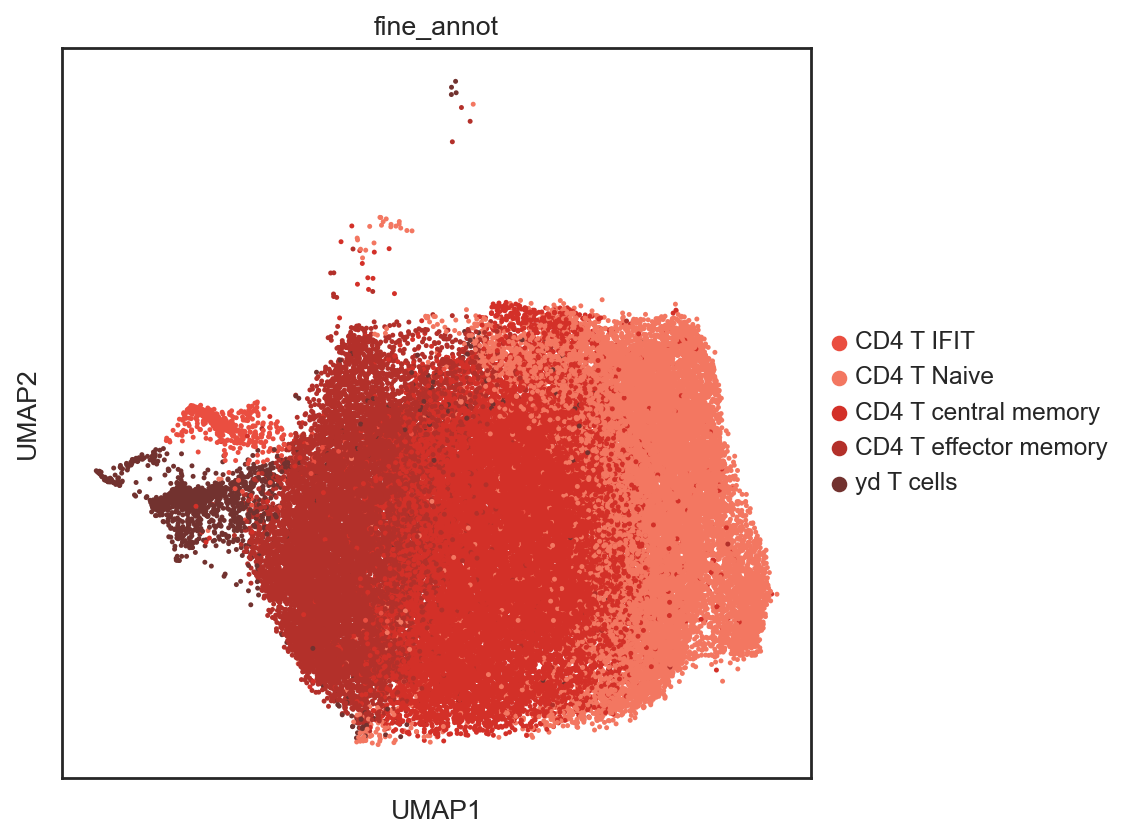

ranking genes
    finished (0:04:12)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


In [17]:
### Figure 2B
cells_dict ={"CD4Tcells":{"leiden": 0.8,
                          "markergenes": ["PTPRC", "CCR7", "IL2RB", "SELL", "CD27", "CD28","IL7R","FOXP3",
                                          "CTLA4", "IL10", "LAG3", "TGFB1", "IL2RB", "CD274","CCR7", "IL2", "FAS",
                                          "IFNG", "IL4", "IL5", "GATA3", "STAT4", "TBX21"],
                         "fine_annot": {"0" :"CD4 T Naive", "1" :"CD4 T effector memory", "2" :"CD4 T central memory",
                                   "3" :"CD4 T central memory", "4" : "CD4 T central memory","5" :"CD4 T Naive",
                                   "6" :"Dead_cells","7" :"yd T cells", "8" :"Doublets","9" :"CD4 T central memory",
                                   "10" :"CD4 T IFIT"},
                         "color_subset": [ '#ea4e40','#f37761', '#d33028', '#b3302a', '#72322f'],
                         "color_cmap":"Reds"},
             
             "CD8Tcells":{"leiden": 0.7,
                          "markergenes": ["PTPRC", "CCR7", "SELL", "CD28", "IL7R" , "PECAM1", "TCF7","ITGAL",
                                            "SPN", "CD44", "ITGA4", "IL2RB", "KLRG1", "SELL",
                                            "KLRB1", "GZMH", "NKG7", "FGFBP2", "KLRG1", "PRF1", "FCGR3A","IFNG", "GZMB",
                                            "TIGIT",  "TOX", "IL23R", "RORC", "EOMES", "TBX21"],
                          "fine_annot":{"0":"CD8 TEMRA","1":"CD8 T Naive", "2":"CD8 T early Tem","3":"CD8 T Naive","4":"Doublets","5":"Dead_cells"},
                          "color_subset":['#FFD6A5','#d08c60','#99582a'],
                          "color_cmap":"Oranges"},   
             
             "Monocytes":{"leiden":0.8,
                          "markergenes": ["CD14","IL1B", "IFI6", "IFITM3", "NFKBIA", "NLRP3","FCGR3A","CDKN1C",
                                      "S100A8", "C1QA", "TNF", "IL6", "IL1B", "ITGAM"],
                          "fine_annot":{"0" :"Myeloid DCs","1" :"IL1b-Monocytes","2" :"Classical Monocytes","3": "Classical Monocytes", "4": "Non-classical Monocytes",
                                  "5": "Platelets_RBCs","6": "IFITM3 Monocytes","7": "Doublets","8": "Doublets","9": "Doublets", "10": "Doublets", "11":"Myeloid DCs"},
                          "color_subset":['#afaed4','#8d89c0','#705eaa', '#7209b7','#3c096c'],
                          "color_cmap":"Purples"},
             
             "NKcells":{"leiden":0.5,
                        "markergenes":["NKG7", "NCAM1", "KLRD1" , "NCR1", "KLRB1", "GNLY", "CCR7", "NCR1"],
                        "fine_annot":{"0" :"NKCD56bright", "1" :"NKCD56bright",  "2" :"NKCD56low", "3": "Doublets"},
                        "color_subset":['#8ed08b', '#2c944c'],
                        "color_cmap":"Greens"},
             
             "Bcells":{"leiden":0.8,
                       "markergenes":["CD79A", "CD19", "CD27", "CD38", "CD7", "ITGAM", "CD38", "MS4A1", "ITGA4", "IGHD", "IGKC", "IGHM"],
                       "fine_annot": {"0" :"Naive Bcells", "1" :"Memory Bcells", "2" :"Naive Bcells", "3": "Memory Bcells",
                                     "4": "Plasmablasts","5": "Plasmablasts","6": "Platelets_RBCs","7": "Doublets","8": "Doublets"},
                       "color_subset":['#2a6f97','#4cc9f0','#023e8a','#0267c1',  '#A0C4FF'],
                       "color_cmap": "Blues"}}

leiden_key = "leiden_subset"

for subset in cells_dict:
    print(subset)
    seed = 123
    np.random.seed(seed)
    
    adata_sub = sc.read_h5ad("./dataOutput/subset_adata/" + subset +"_clustered.h5ad")
    adata_sub.uns['log1p']['base'] = None
    
    sc.pl.umap(adata_sub, color=["fine_annot"], wspace=0.35, size=20, save="Figure1C_%s_fine_annot.pdf"%subset)
    
    #subset leiden clustering
    sc.tl.rank_genes_groups(adata_sub, groupby="fine_annot", use_raw=False, pts=True, key_added=leiden_key+"_rank", method='wilcoxon')
    sc.pp.scale(adata_sub, zero_center = True)
    
    fig = sc.pl.rank_genes_groups_dotplot(adata_sub, n_genes=4, key=leiden_key+"_rank", groupby="fine_annot", 
                                use_raw = False, cmap = cells_dict[subset]["color_cmap"],return_fig=True) 

    expression = fig.dot_color_df
    fraction = fig.dot_size_df

    fraction.index = [ind+"_fraction_of_cells" for ind in fraction.index]
    expression.index = [ind+"_expression" for ind in expression.index]

    all_raw_df = expression.append(fraction)
    all_raw_df.to_csv(f"./figures/RawFigureData/Figure2B_{subset}_raw.csv")
    

## Figure 1D

Correlation heatmapo between cells subsets

In [4]:
##### To do after the subset annotation
inputPath = './dataOutput/adata/final.h5ad'

adata = sc.read(inputPath)

corr_df = sc.pl.correlation_matrix(adata, groupby = "fine_annot", 
                                   save="Figure1D.pdf", show=False,
                                  show_correlation_numbers=False)



    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_fine_annot']`


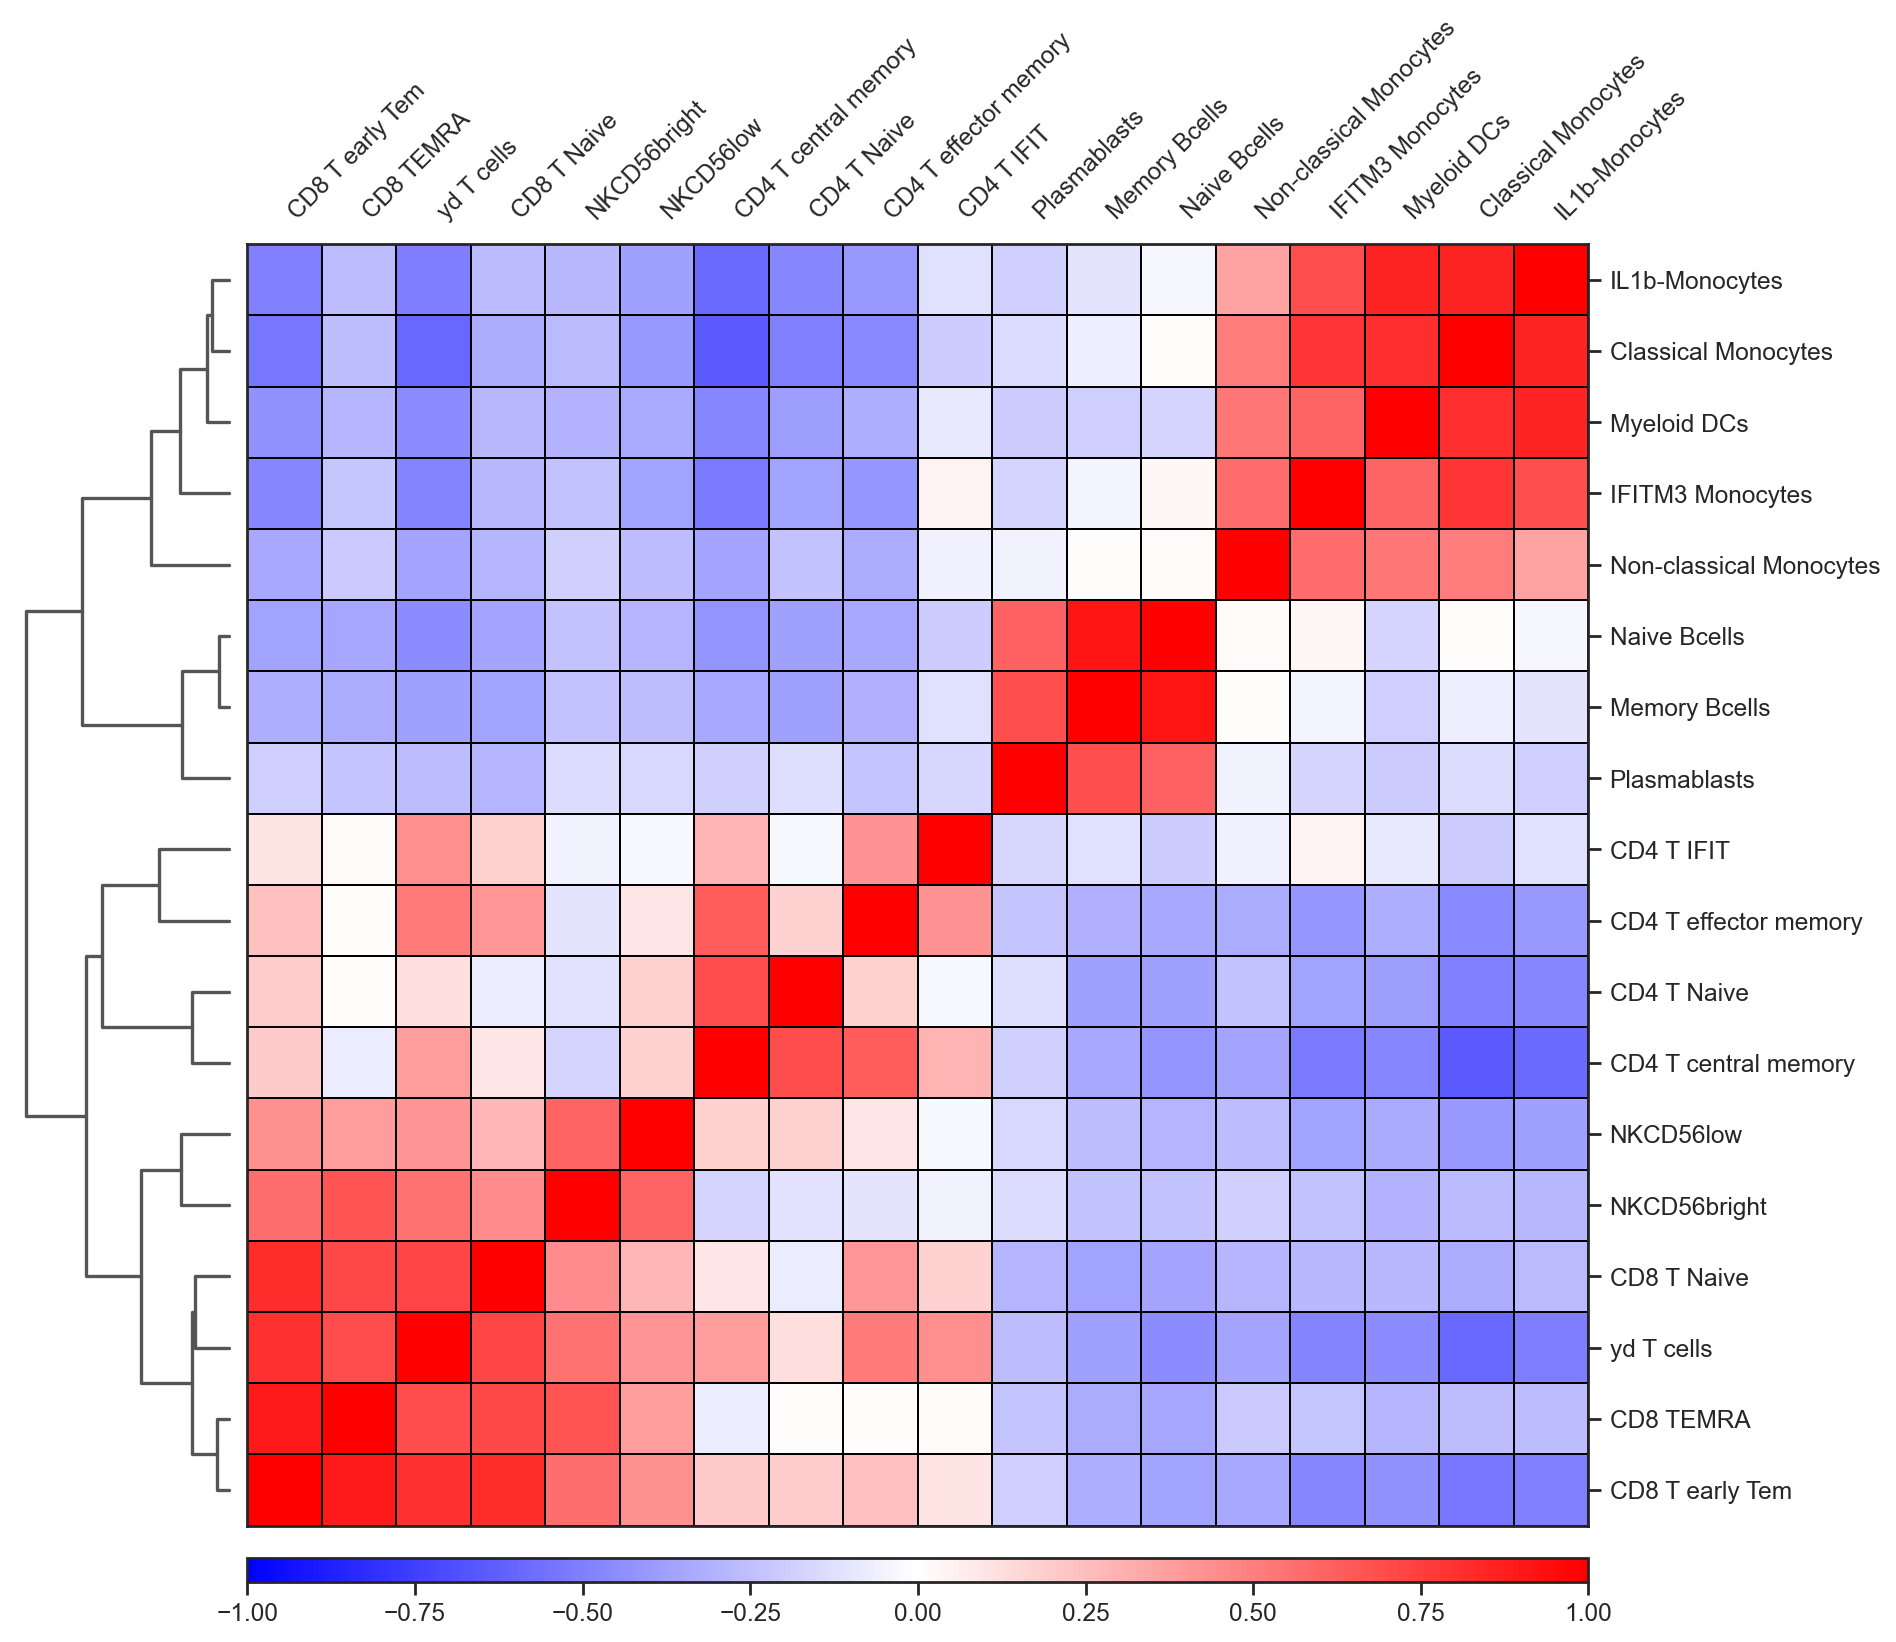

In [5]:
corr_df[0].figure


In [6]:
corr_df = pd.DataFrame(adata.uns["dendrogram_fine_annot"]['correlation_matrix'])
labels = adata.obs["fine_annot"].cat.categories

corr_df.columns = labels
corr_df.index = labels

corr_df.to_csv("./figures/RawFigureData/Figure1D_raw.csv")


## Figure S3

**Proportion analysis**\
We performed a quality control analysis on control 7 that was replicated in 3 batches. We also performed a proportion analysis for cell proportion between samples, cell proportions according to disease activity 

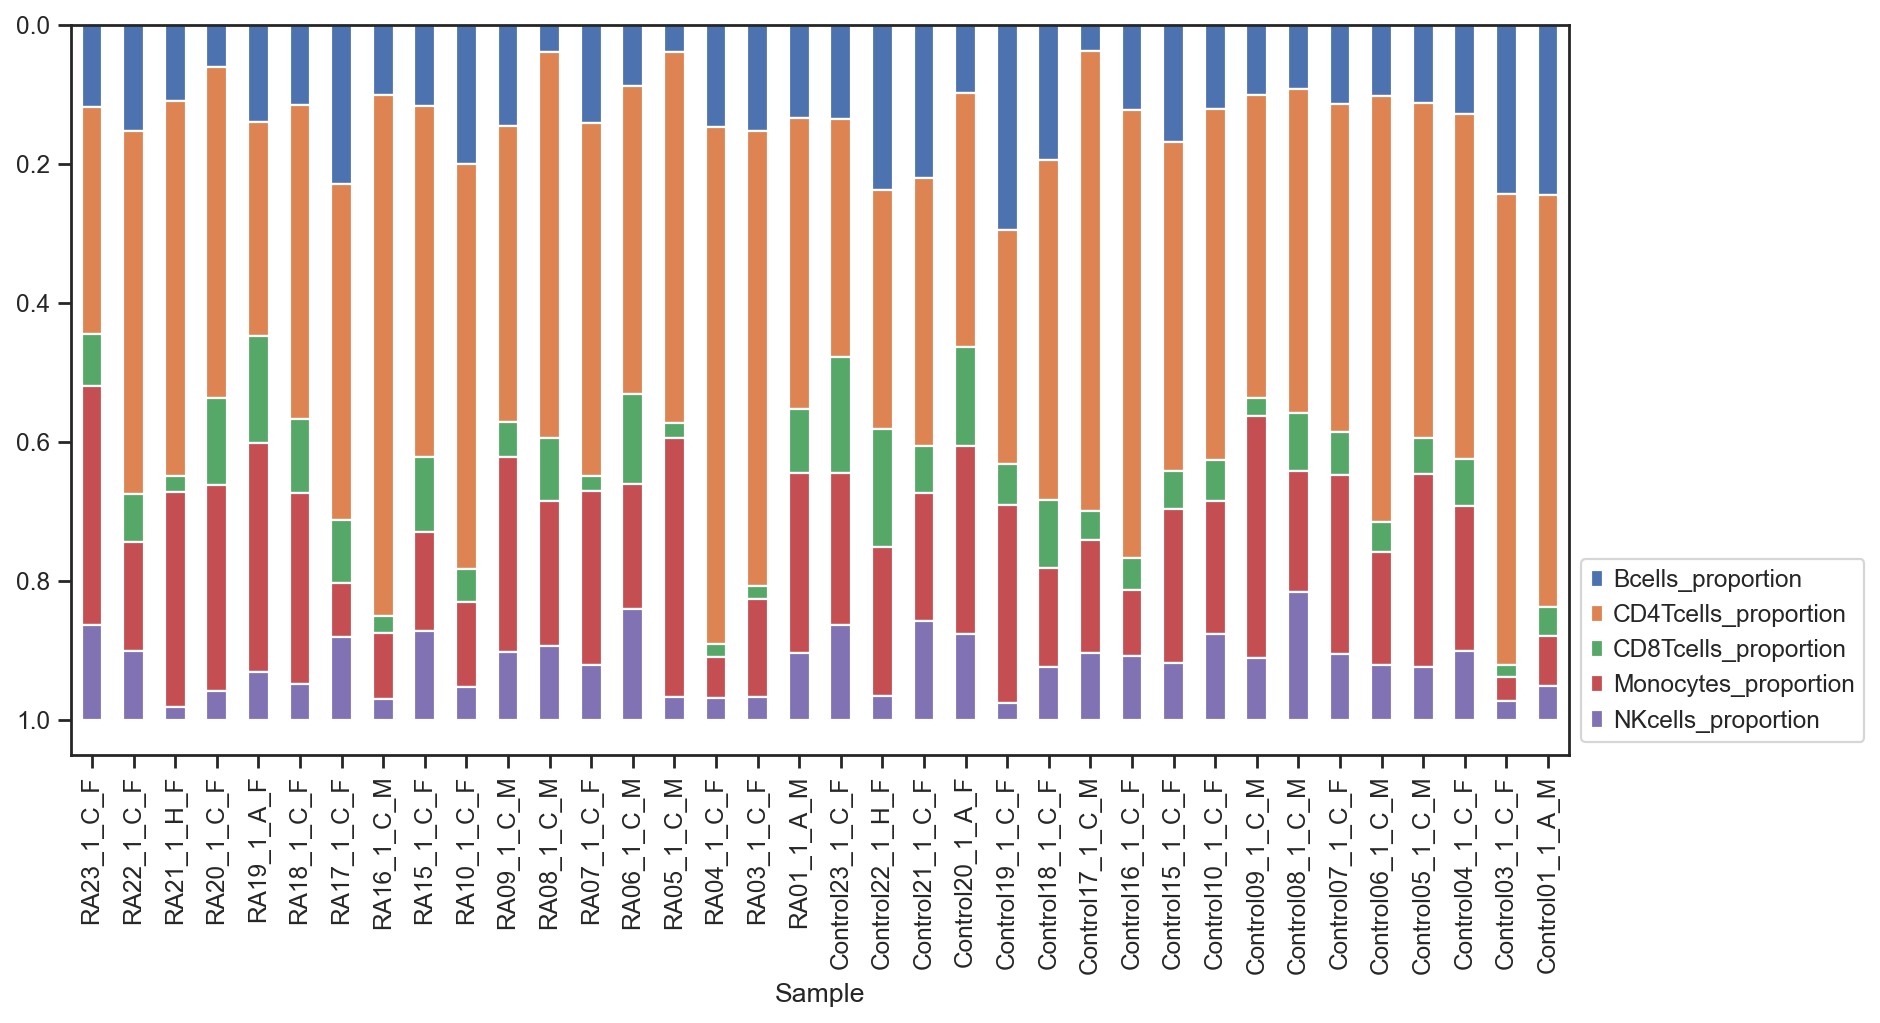

In [16]:
##### To do after the subset annotation
inputPath = './dataOutput/adata/final.h5ad'

adata = sc.read(inputPath)

# remove control 7 from batches 1 & 2
adata_plot=adata[~(adata.obs["Sample"].str.contains("Control07") & adata.obs["batch"].str.contains("1|2")),:]

# plot proportion of cells in each sample
tmp_norm = pd.crosstab(adata.obs['Sample'],adata.obs['rough_annot'], normalize='index')
tmp_norm.columns = [c+"_proportion" for c in tmp_norm.columns]

ax = tmp_norm.plot(kind = "bar",stacked=True, figsize=(12,6))
ax.legend(loc='lower left', bbox_to_anchor=(1, 0., 0.5, 0.5))
ax.invert_yaxis()
ax.invert_xaxis()
plt.savefig('figure1D.pdf')

# Raw data
tmp = pd.crosstab(adata.obs['Sample'],adata.obs['rough_annot'], normalize=False)
tmp.columns = [c+"_count" for c in tmp.columns]
tmp = tmp.join(tmp_norm)
tmp.to_csv("./figures/RawFigureData/FigureS3_raw.csv")


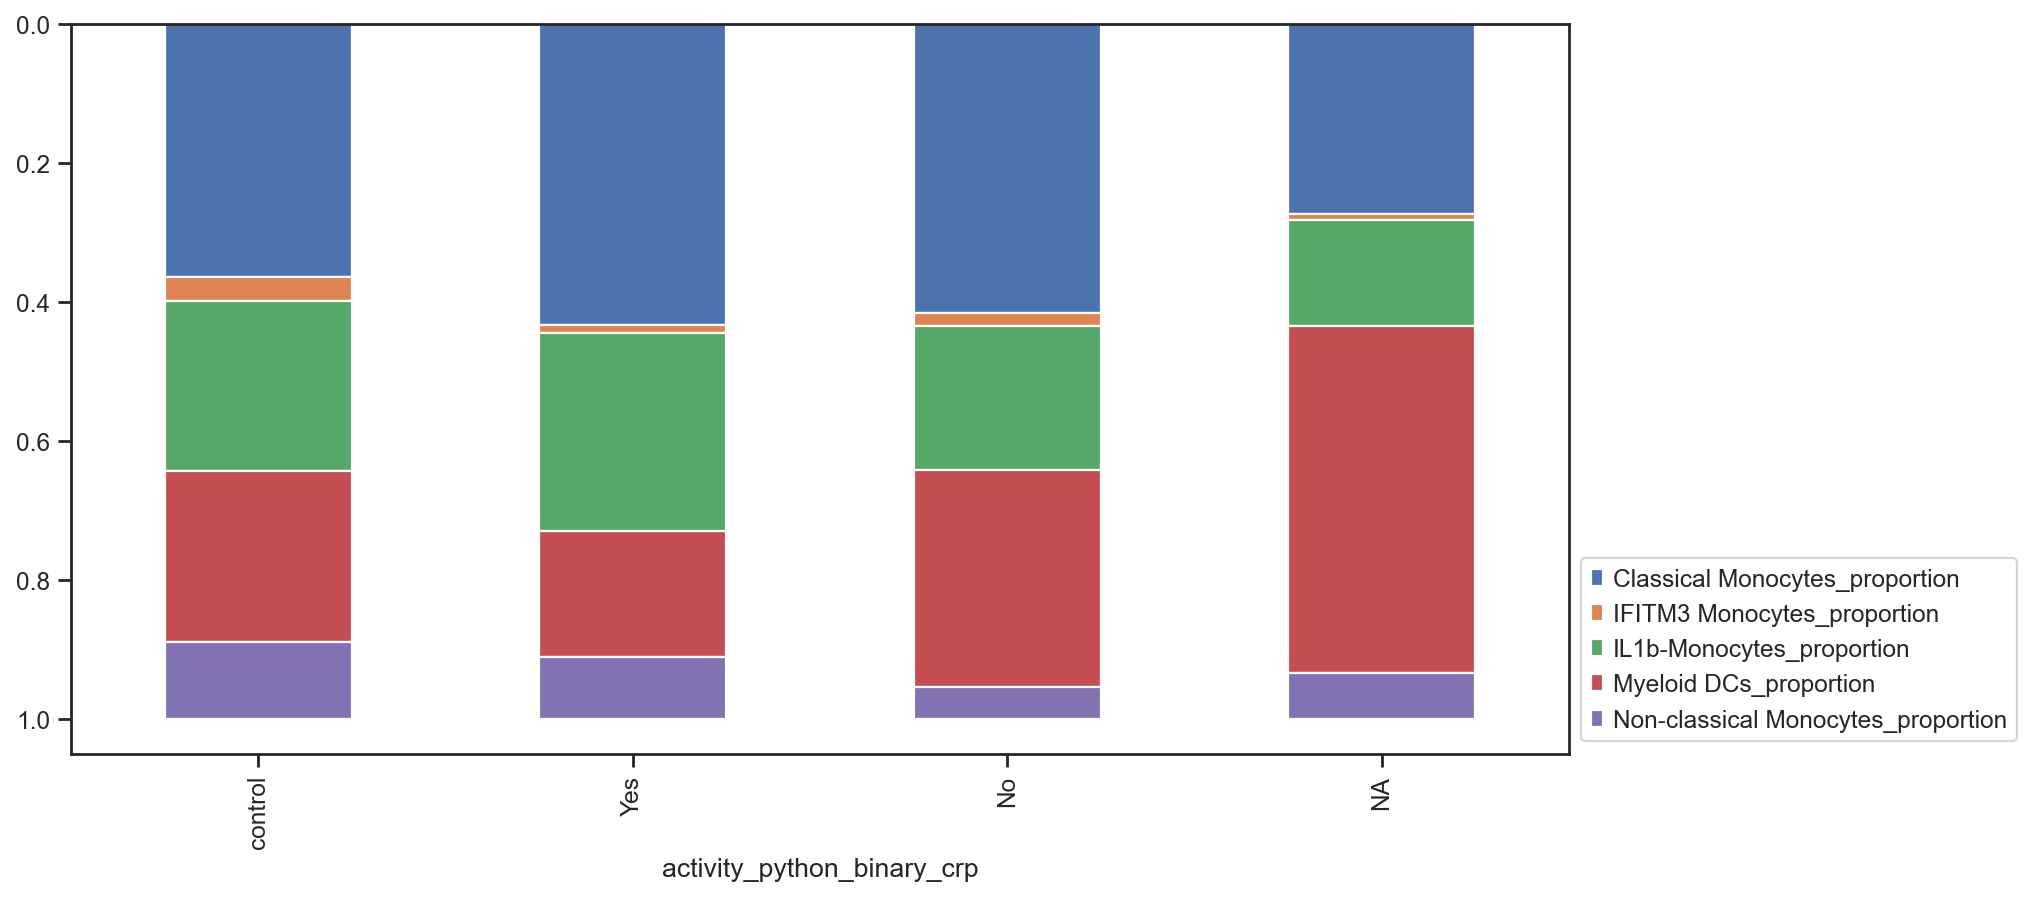

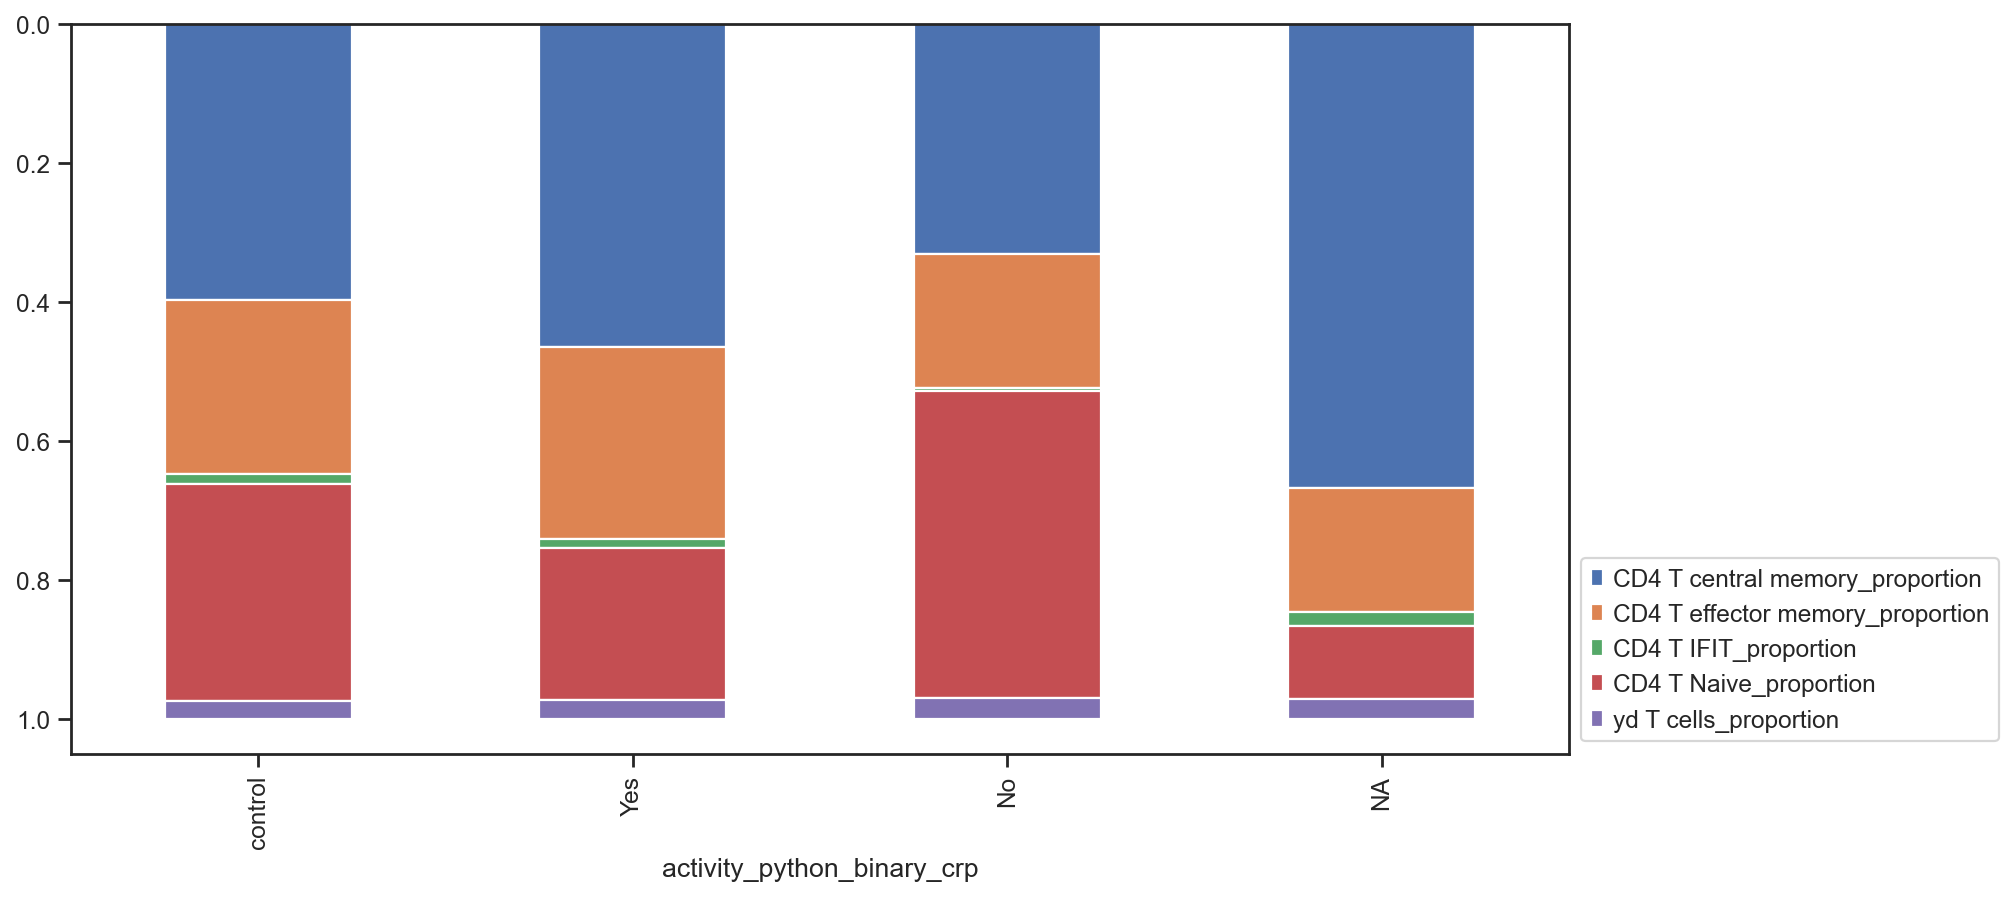

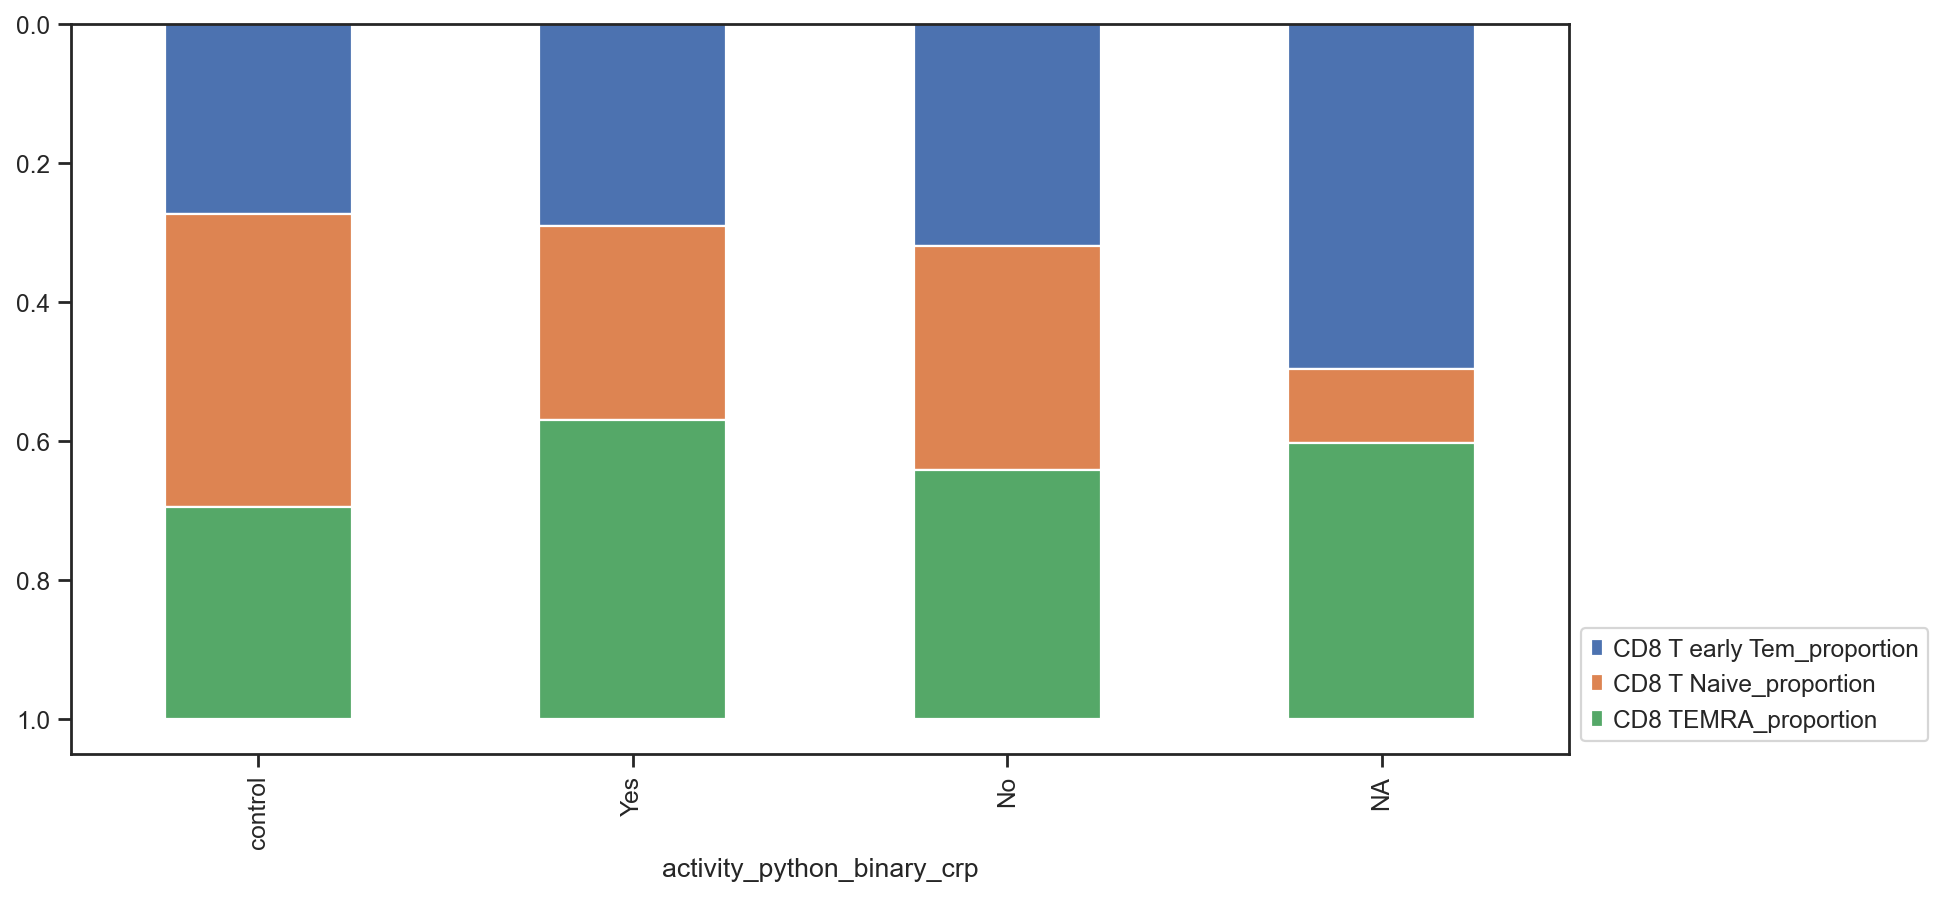

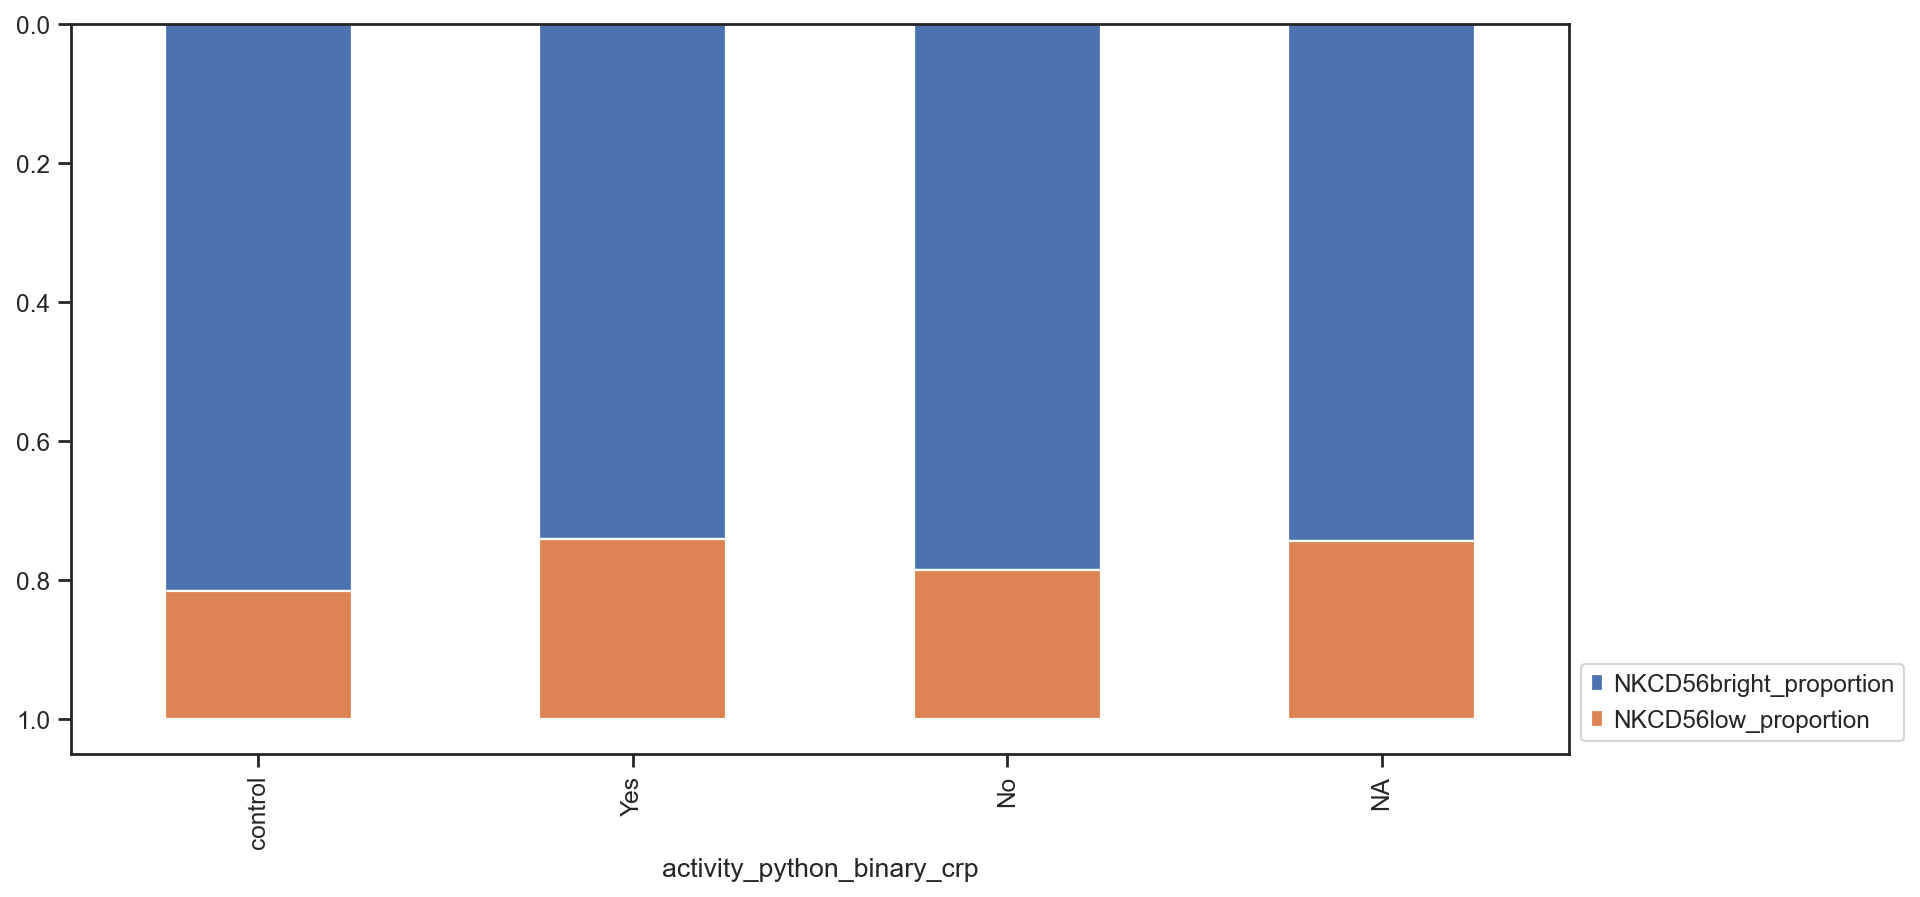

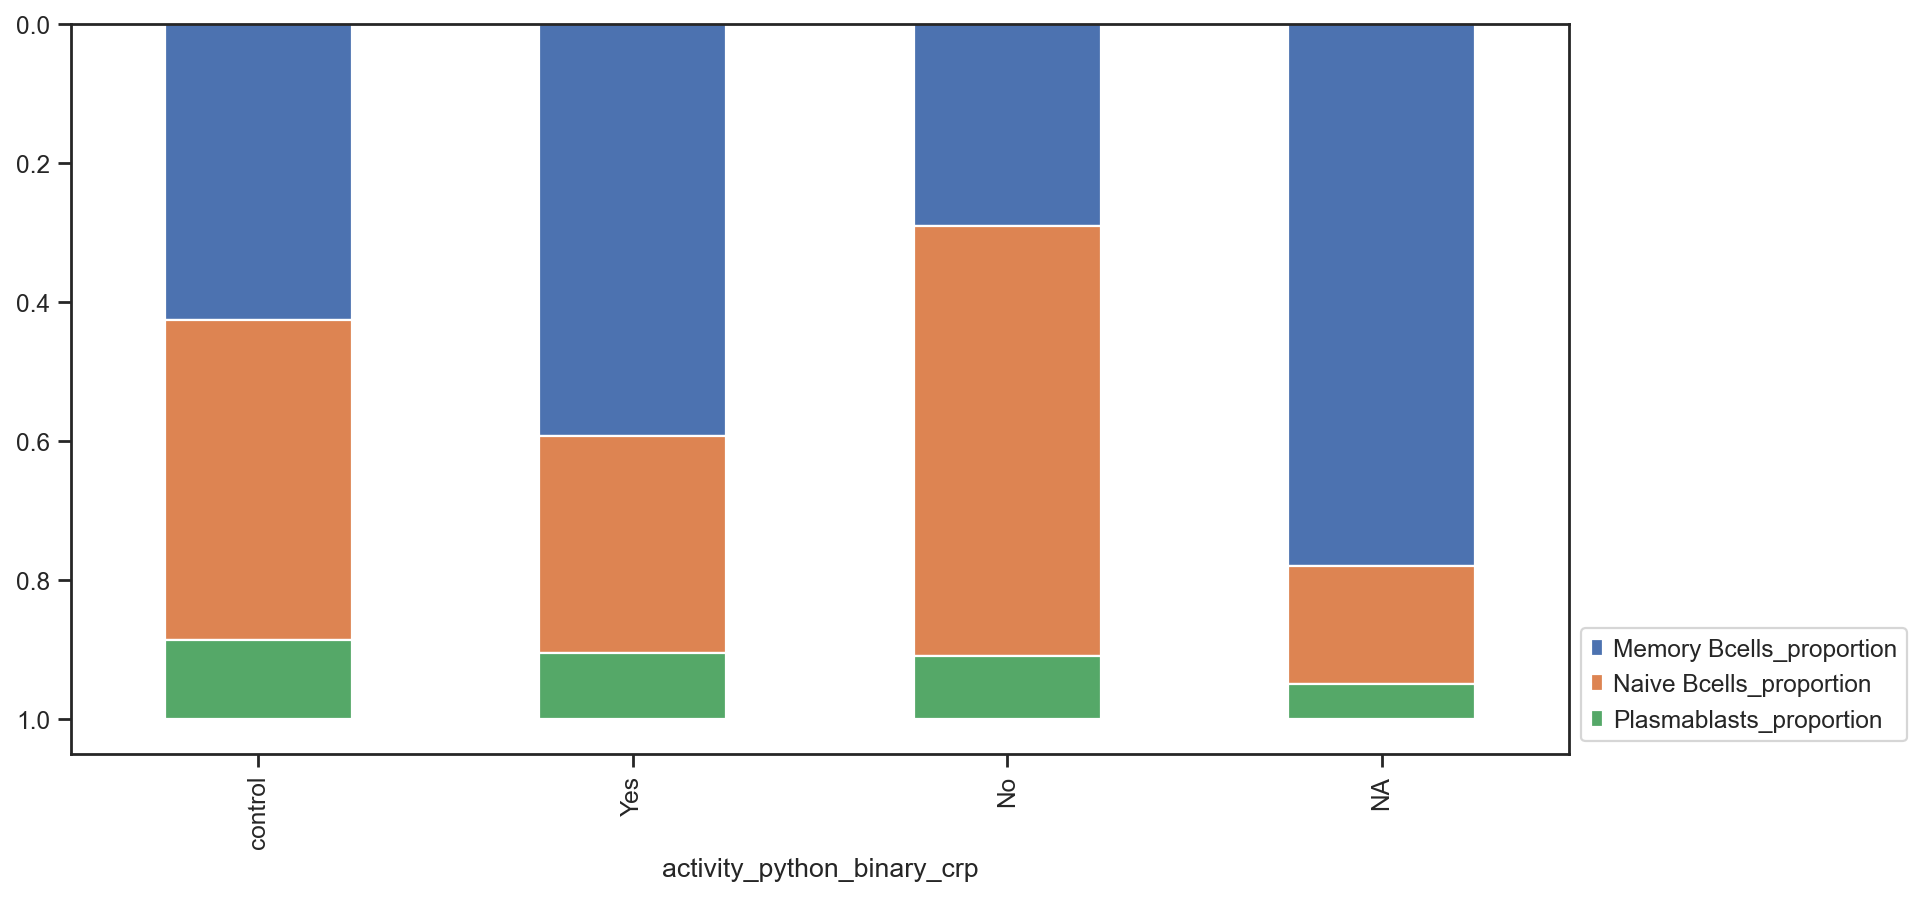

In [16]:
##### To do after the subset annotation
inputPath = './dataOutput/adata/final.h5ad'

adata = sc.read(inputPath)

for cell_type in adata.obs["rough_annot"].unique():

    # remove control 7 from batches 1 & 2
    adata_plot=adata[~(adata.obs["Sample"].str.contains("Control07") & adata.obs["batch"].str.contains("1|2")),:]
    adata_plot = adata_plot[adata_plot.obs["rough_annot"]==cell_type]
    
    # plot proportion of cells in each sample
    tmp_norm = pd.crosstab(adata_plot.obs['activity_python_binary_crp'],adata.obs['fine_annot'], normalize='index')
    tmp_norm.columns = [c+"_proportion" for c in tmp_norm.columns]

    ax = tmp_norm.plot(kind = "bar",stacked=True, figsize=(12,6))
    ax.legend(loc='lower left', bbox_to_anchor=(1, 0., 0.5, 0.5))
    ax.invert_yaxis()
    ax.invert_xaxis()
    plt.savefig('figure1D.pdf')

    # Raw data
    tmp = pd.crosstab(adata.obs['Sample'],adata.obs['rough_annot'], normalize=False)
    tmp.columns = [c+"_count" for c in tmp.columns]
    tmp = tmp.join(tmp_norm)


## Figure S2

Markers genes expression heatmap between subsets

In [7]:
inputPath = './dataOutput/adata/final.h5ad'

#sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, key="rough_annot", use_raw = False, ncols=6)

adata = sc.read(inputPath)
adata.uns['log1p']['base'] = None 
cells_subset_dict ={"CD4Tcells":["CD4 T Naive", "CD4 T effector memory", "CD4 T central memory","yd T cells", "CD4 T IFIT"],
                    "CD8Tcells":["CD8 T Naive","CD8 T early Tem", "CD8 TEMRA"],
                    "NKcells":["NKCD56bright","NKCD56low"],
                    "Monocytes":["Classical Monocytes","IFITM3 Monocytes","Non-classical Monocytes","IL1b-Monocytes","Myeloid DCs"],
                    "Bcells":["Naive Bcells","Memory Bcells","Plasmablasts"]}

marker_genes_dict = {'Bcells': ['CD79A', 'MS4A1', "IGKC"],
                     'CD4Tcells': ['CD3D'],
                     'CD8Tcells': ['CD8A', 'CD8B'],
                     'NKcells': ['GNLY', 'NKG7',],
                     'Monocytes': ['CST3', 'LYZ','FCGR3A']}

sc.pp.scale(adata, zero_center=True)

matrix_df = sc.pl.matrixplot(adata, marker_genes_dict, groupby = "fine_annot", dendrogram=True,
                 use_raw = False, vmax = 1,standard_scale = "var", save= "FigureS3.pdf", return_fig=True)


... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_fine_annot']`
categories: CD4 T central memory, CD4 T effector memory, CD4 T IFIT, etc.
var_group_labels: Bcells, CD4Tcells, CD8Tcells, etc.


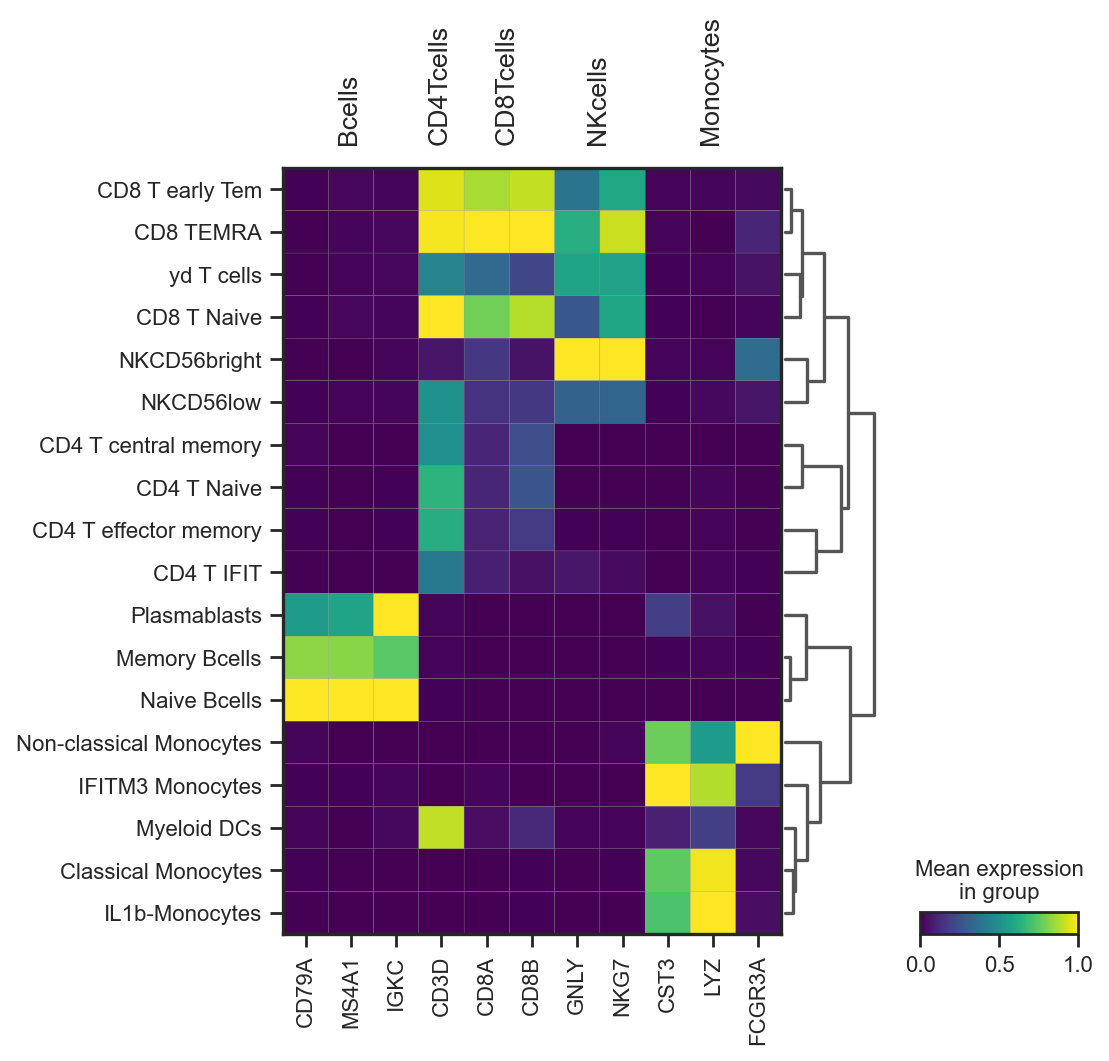

In [195]:
matrix_df.show()


In [15]:
matrix_df.values_df.to_csv("./figures/RawFigureData/FigureS2_raw.csv")
matrix_df.values_df


,CD79A,MS4A1,IGKC,CD3D,CD8A,CD8B,GNLY,NKG7,CST3,LYZ,FCGR3A
fine_annot,,,,,,,,,,,
CD4 T central memory,0.007843,0.003118,0.001881,0.492256,0.101817,2.359513e-01,0.001916,0.001401,0.000615,0.003834,0.002050
CD4 T effector memory,0.005874,0.002708,0.005058,0.624637,0.096194,1.671606e-01,0.006685,0.004558,0.001832,0.010229,0.002080
CD4 T IFIT,0.000000,0.001016,0.002491,0.404463,0.086986,4.047864e-02,0.059587,0.029746,0.003777,0.010781,0.004165
CD4 T Naive,0.006195,0.002435,0.006418,0.646808,0.108925,2.598524e-01,0.002361,0.003425,0.000000,0.012267,0.002258
yd T cells,0.001502,0.010284,0.017657,0.449354,0.340670,2.073029e-01,0.582846,0.574672,0.005906,0.011349,0.050642
CD8 T early Tem,0.005005,0.015802,0.015548,0.947021,0.870557,9.073477e-01,0.382925,0.597454,0.010939,0.013505,0.026324
CD8 T Naive,0.004548,0.018018,0.015167,1.000000,0.783477,8.902795e-01,0.272703,0.591597,0.007379,0.000000,0.014068
CD8 TEMRA,0.002030,0.012345,0.018054,0.986064,1.000000,1.000000e+00,0.627903,0.914659,0.009828,0.000111,0.103953
Classical Monocytes,0.006362,0.000000,0.003294,0.000000,0.000000,5.935534e-03,0.001011,0.003943,0.752275,0.979769,0.022760
